# The Convolution Operator

Version 1.0

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to show some basic examples to understand what convolution is.

## Notebook Learning Goals

At the end of the notebook you are going to know what convolution is and why it is the base upon which convolutional neural networks (CNNs) are built. 

## Convolution in Neural Networks

In the context of neural networks, and in particular CNNs, the convolution operation is performed between tensors. It gets two tensors as input and it produces a tensor as output and it is usually indicated with the operator *.

Consider two tensors, both with dimensions 3 x 3. The convolution operation is done by applying the following formula:

$$
\begin{pmatrix}
a_1 & a_2 & a_3\\
a_4 & a_5 & a_6\\
a_7 & a_8 & a_9\\
\end{pmatrix} *
\begin{pmatrix}
k_1 & k_2 & k_3\\
k_4 & k_5 & k_6\\
k_7 & k_8 & k_9\\
\end{pmatrix} =\sum_{i=1}^9 a_ik_i
$$

In advanced applications, you normally perform convolution betweeen an image with high resolution (that we can call $A$, for example of dimensions 1024 x 1024 x 3 in the case of image recognition) and a smaller matrix, called **kernel** (that we can call $K$), typically of dimension 3 x 3 or 5 x 5. In this case, $K$ slides on $A$. Let us see why. Given

$$
A =
\begin{pmatrix}
a_1 & a_2 & a_3 & a_4\\
a_5 & a_6 & a_7 & a_8\\
a_9 & a_{10} & a_{11} & a_{12}\\
a_{13} & a_{14} & a_{15} & a_{16}
\end{pmatrix}
$$

and

$$
K =
\begin{pmatrix}
k_1 & k_2 & k_3\\
k_4 & k_5 & k_6\\
k_7 & k_8 & k_9
\end{pmatrix}
$$

the convolution is first performed between $K$ and the elements highlighted in bold, as followed

$$
\begin{pmatrix}
\mathbf{a_1} & \mathbf{a_2} & \mathbf{a_3} & a_4\\
\mathbf{a_5} & \mathbf{a_6} & \mathbf{a_7} & a_8\\
\mathbf{a_9} & \mathbf{a_{10}} & \mathbf{a_{11}} & a_{12}\\
a_{13} & a_{14} & a_{15} & a_{16}
\end{pmatrix}
$$

The result can be indicated with $B_1$. Then, $K$ shifts one column right, and convolution is again performed between $K$ and the elements highlighted in bold, as followed

$$
\begin{pmatrix}
a_1 & \mathbf{a_2} & \mathbf{a_3} & \mathbf{a_4}\\
a_5 & \mathbf{a_6} & \mathbf{a_7} & \mathbf{a_8}\\
a_9 & \mathbf{a_{10}} & \mathbf{a_{11}} & \mathbf{a_{12}}\\
a_{13} & a_{14} & a_{15} & a_{16}
\end{pmatrix}
$$

We obtain $B_2$. Then, since we cannot shift $K$ anymore to the right, we shift it one row down and start again from the left side 

$$
\begin{pmatrix}
a_1 & a_2 & a_3 & a_4\\
\mathbf{a_5} & \mathbf{a_6} & \mathbf{a_7} & a_8\\
\mathbf{a_9} & \mathbf{a_{10}} & \mathbf{a_{11}} & a_{12}\\
\mathbf{a_{13}} & \mathbf{a_{14}} & \mathbf{a_{15}} & a_{16}
\end{pmatrix}
$$

And finally

$$
\begin{pmatrix}
a_1 & a_2 & a_3 & a_4\\
a_5 & \mathbf{a_6} & \mathbf{a_7} & \mathbf{a_8}\\
a_9 & \mathbf{a_{10}} & \mathbf{a_{11}} & \mathbf{a_{12}}\\
a_{13} & \mathbf{a_{14}} & \mathbf{a_{15}} & \mathbf{a_{16}}
\end{pmatrix}
$$

In the end, the result will be the following matrix

$$
B =
\begin{pmatrix}
B_1 & B_2\\
B_3 & B_4
\end{pmatrix}
$$

The number of columns and rows by which the kernel is shifted along the matrix is called **stride** ($s$).

## Libraries Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The following function can evaluate the convolution of two matrices for $s=1$.

In [ ]:
def conv_2d(A, kernel):

    output = np.zeros([A.shape[0]-(kernel.shape[0]-1), A.shape[1]-(kernel.shape[0]-1)])
    
    for row in range(1, A.shape[0]-1):
        for column in range(1, A.shape[1]-1):
            output[row-1, column-1] = np.tensordot(A[row-1:row+2, column-1:column+2], kernel)
    
    return output

The previous example can be evaluated with the following code, as an example:

In [ ]:
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
K = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(conv_2d(A,K))

[[348. 393.]
 [528. 573.]]


### Examples of Convolution

We will now perform some examples of convolution operations.

Let us first build a chessboard of dimensions 160 x 160, which we will use to test several types of kernels.

In [ ]:
chessboard = np.zeros([8*20, 8*20])
for row in range(0, 8):
    for column in range (0, 8):
        if ((column+8*row) % 2 == 1) and (row % 2 == 0):
            chessboard[row*20:row*20+20, column*20:column*20+20] = 1
        elif ((column+8*row) % 2 == 0) and (row % 2 == 1):
            chessboard[row*20:row*20+20, column*20:column*20+20] = 1

In [ ]:
chessboard.shape

(160, 160)

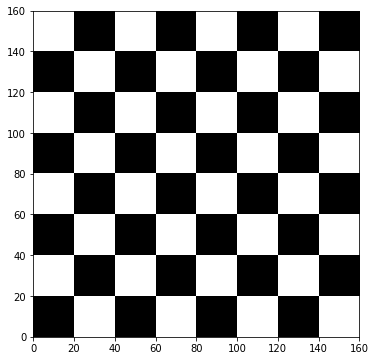

In [ ]:
plt.figure(figsize = (6, 6))
plt.imshow(chessboard, cmap = 'Greys', interpolation = 'nearest', extent = [0, 160, 0, 160])
#plt.savefig('./Figure15-5', dpi = 300)
plt.show()

#### Horizontal Edges Detection Kernel

The following kernel is able to detect horizontal edges inside images. Let us show an example using the above-built chessboard.

$$
K_H =
\begin{pmatrix}
1 & 1 & 1\\
0 & 0 & 0\\
-1 & -1 & -1
\end{pmatrix}
$$

In [ ]:
edgeh = np.matrix('1 1 1; 0 0 0; -1 -1 -1')
outputh = conv_2d(chessboard, edgeh)

In [ ]:
outputh.shape

(158, 158)

The fact that the convolution operation's result has a smaller shape than the original matrix depends on the matrix and kernel's dimensions. To get more details, see the correspondent hands-on chapter of the book.

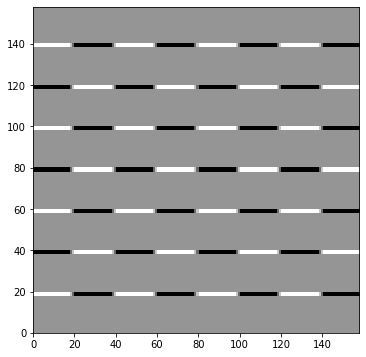

In [ ]:
plt.figure(figsize = (6, 6))
plt.imshow(outputh, cmap = 'Greys', interpolation = 'nearest', extent = [0, 158, 0, 158])
#plt.savefig('./Figure15-6', dpi = 300)
plt.show()

You can observe the horizontal variations in the above figure. Additional, this kernel detects if you go from light to dark or vice versa.

#### Vertical Edges Detection Kernel

The following kernel is able to detect vertical edges inside images. Let us show an example using the above-built chessboard.

$$
K_V =
\begin{pmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{pmatrix}
$$

In [ ]:
edgev = np.matrix('1 0 -1; 1 0 -1; 1 0 -1')
outputv = conv_2d(chessboard, edgev)

In [ ]:
outputv.shape

(158, 158)

Again, the fact that the convolution operation's result has a smaller shape than the original matrix depends on the matrix and kernel's dimensions. To get more details, see the correspondent hands-on chapter of the book.

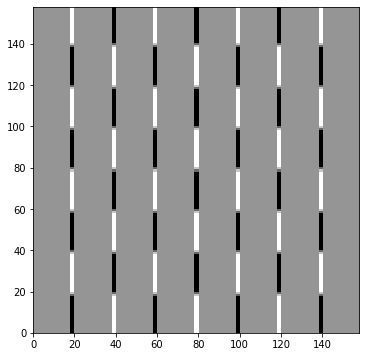

In [ ]:
plt.figure(figsize = (6, 6))
plt.imshow(outputv, cmap = 'Greys', interpolation = 'nearest', extent = [0, 158, 0, 158])
#plt.savefig('./Figure15-7', dpi = 300)
plt.show()

You can observe the vertical variations in the above figure. Additional, this kernel detects if you go from light to dark or vice versa.

#### Luminosity Change in Edges Detection Kernel

The following kernel is able to detect if luminosity changes inside an image. Let us show an example using the above-built chessboard.

$$
K_L =
\begin{pmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{pmatrix}
$$

In [ ]:
edgel = np.matrix ('-1 -1 -1; -1 8 -1; -1 -1 -1')
outputl = conv_2d(chessboard, edgel)

In [ ]:
outputl.shape

(158, 158)

Again, the fact that the convolution operation's result has a smaller shape than the original matrix depends on the matrix and kernel's dimensions. To get more details, see the correspondent hands-on chapter of the book.

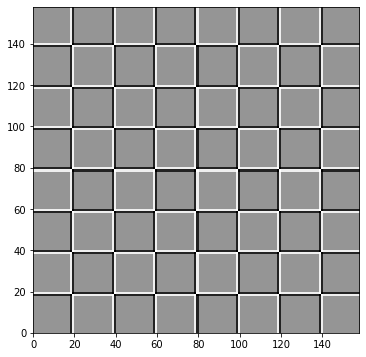

In [ ]:
plt.figure(figsize = (6, 6))
plt.imshow(outputl, cmap = 'Greys', interpolation = 'nearest', extent = [0, 158, 0, 158])
#plt.savefig('./Figure15-8', dpi = 300)
plt.show()

You can observe the luminosity variations of each square in the above figure.

#### Blurring Edges Kernel

The following kernel is able to blur the edges of an image. Let us show an example using the above-built chessboard.

$$
K_B = \frac{1}{9}
\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}
$$

In [ ]:
edge_blur = 1.0/9.0*np.matrix('1 1 1; 1 1 1; 1 1 1')
output_blur = conv_2d(chessboard, edge_blur)

In [ ]:
output_blur.shape

(158, 158)

Again, the fact that the convolution operation's result has a smaller shape than the original matrix depends on the matrix and kernel's dimensions. To get more details, see the correspondent hands-on chapter of the book.

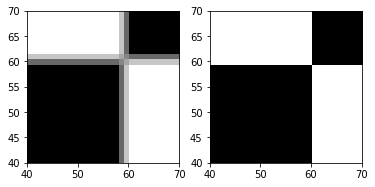

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(output_blur[90:118, 40:70], cmap = 'Greys', interpolation = 'nearest', extent = [40, 70, 40, 70])
ax2.imshow(chessboard[90:118, 40:70], cmap = 'Greys', interpolation = 'nearest', extent = [40, 70, 40, 70])
#plt.savefig('./Figure15-9', dpi = 300)
plt.show()

You can observe a zoomed part of the original (on the right) and the blurred (on the left) chessboard in the above figure.

### A Final Example

To fully understand how convolution works, we need to make a final example on how edges are practically detected.

Let us consider a matrix with a sharp vertical transition:

In [ ]:
ex_mat = np.matrix('10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0; 10 10 10 10 0 0 0 0')

In [ ]:
ex_mat

matrix([[10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0],
        [10, 10, 10, 10,  0,  0,  0,  0]])

As you can see, we have built the matrix so that its left part is all made by 10s, while its right part is all made by 0s.

Now we perform a convolution with the vertical edges detector kernel.

In [ ]:
ex_out = conv_2d (ex_mat, edgev)

The result is:

In [ ]:
ex_out

array([[ 0.,  0., 30., 30.,  0.,  0.],
       [ 0.,  0., 30., 30.,  0.,  0.],
       [ 0.,  0., 30., 30.,  0.,  0.],
       [ 0.,  0., 30., 30.,  0.,  0.],
       [ 0.,  0., 30., 30.,  0.,  0.],
       [ 0.,  0., 30., 30.,  0.,  0.]])

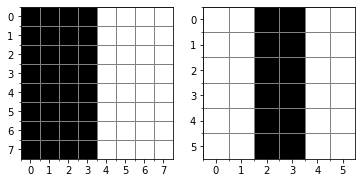

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ex_mat, cmap = 'Greys', interpolation = 'nearest')
ax2.imshow(ex_out, cmap = 'Greys', interpolation = 'nearest')

# The following lines are needed to format the plots.
# You can safely ignore them.
# major ticks
ax1.set_xticks(np.arange(0, 8, 1))
ax1.set_yticks(np.arange(0, 8, 1))
# labels for major ticks
ax1.set_xticklabels(np.arange(0, 8, 1))
ax1.set_yticklabels(np.arange(0, 8, 1))
# minor ticks
ax1.set_xticks(np.arange(-0.5, 7.5, 1), minor = True)
ax1.set_yticks(np.arange(-0.5, 7.5, 1), minor = True)
# gridlines based on minor ticks
ax1.grid(which = 'minor', color = 'grey', linestyle = '-', linewidth = 1)
# major ticks
ax2.set_xticks(np.arange(0, 6, 1))
ax2.set_yticks(np.arange(0, 6, 1))
# labels for major ticks
ax2.set_xticklabels(np.arange(0, 6, 1))
ax2.set_yticklabels(np.arange(0, 6, 1))
# minor ticks
ax2.set_xticks(np.arange(-0.5, 5.5, 1), minor = True)
ax2.set_yticks(np.arange(-0.5, 5.5, 1), minor = True)
# gridlines based on minor ticks
ax2.grid(which = 'minor', color = 'grey', linestyle = '-', linewidth = 1)

#plt.savefig('./Figure15-10', dpi = 300)
plt.show()

The convolution with the vertical edges detector kernel has clearly detected the sharp transition in the original matrix marking with a vertical black line where the transition from black to white happens, as you can notice from the above figure. This is possible thanks to the form of the kernel that, when multiplied by the original matrix, highlights the edge (resulting in a big number after the convolution) and ignores the parts where no change in colour happens (resulting in zero value).

## Exercises

1. [*Easy Difficulty*] Try to apply the different convolution operators like the ones we saw together in this notebook, but to different images, like the handwritten digits of the MNIST database (http://yann.lecun.com/exdb/mnist/). To download the dataset from TensorFlow use the following lines of code:
```
from tensorflow import keras 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
```